In [3]:
insta

,Unnamed: 0,mutual_connecting,total_following,total_followers,media_url,media_likes,media_comments,name,username,private_account,business_account,recently_joined
0,0,0,107,69,https://instagram.fixr1-1.fna.fbcdn.net/vp/b61...,36,3,Ольга Петришина,7olga7777777,False,False,False
1,1,0,107,69,https://instagram.fixr1-1.fna.fbcdn.net/vp/628...,25,4,Ольга Петришина,7olga7777777,False,False,False
2,2,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/972...,5,0,aadam kathst,aadamkathst,False,False,False
3,3,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/a5a...,4,0,aadam kathst,aadamkathst,False,False,False
4,4,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/e52...,5,0,aadam kathst,aadamkathst,False,False,False
5,5,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/6c2...,3,0,aadam kathst,aadamkathst,False,False,False
6,6,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/549...,6,0,aadam kathst,aadamkathst,False,False,False
7,7,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/230...,4,0,aadam kathst,aadamkathst,False,False,False
8,8,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/362...,2,0,aadam kathst,aadamkathst,False,False,False
9,9,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/58b...,3,0,aadam kathst,aadamkathst,False,False,False


In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as ppf
import seaborn as sns

In [2]:
#reading the data
insta = pd.read_csv("./extract_data.csv")
insta.head()

,Unnamed: 0,mutual_connecting,total_following,total_followers,media_url,media_likes,media_comments,name,username,private_account,business_account,recently_joined
0,0,0,107,69,https://instagram.fixr1-1.fna.fbcdn.net/vp/b61...,36,3,Ольга Петришина,7olga7777777,False,False,False
1,1,0,107,69,https://instagram.fixr1-1.fna.fbcdn.net/vp/628...,25,4,Ольга Петришина,7olga7777777,False,False,False
2,2,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/972...,5,0,aadam kathst,aadamkathst,False,False,False
3,3,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/a5a...,4,0,aadam kathst,aadamkathst,False,False,False
4,4,2,212,40,https://instagram.fixr1-1.fna.fbcdn.net/vp/e52...,5,0,aadam kathst,aadamkathst,False,False,False


In [4]:
insta.columns

Index(['Unnamed: 0', 'mutual_connecting', 'total_following', 'total_followers',
       'media_url', 'media_likes', 'media_comments', 'name', 'username',
       'private_account', 'business_account', 'recently_joined'],
      dtype='object')

In [5]:
insta.shape

(4353, 12)

In [6]:
#dropping unnamed column and media url
del insta["Unnamed: 0"]
del insta["media_url"]

In [7]:
insta.head()

,mutual_connecting,total_following,total_followers,media_likes,media_comments,name,username,private_account,business_account,recently_joined
0,0,107,69,36,3,Ольга Петришина,7olga7777777,False,False,False
1,0,107,69,25,4,Ольга Петришина,7olga7777777,False,False,False
2,2,212,40,5,0,aadam kathst,aadamkathst,False,False,False
3,2,212,40,4,0,aadam kathst,aadamkathst,False,False,False
4,2,212,40,5,0,aadam kathst,aadamkathst,False,False,False


In [8]:
#rearranging columns
insta = insta.iloc[:,[6,5,0,1,2,3,4,7,8,9]]
insta.head()

,username,name,mutual_connecting,total_following,total_followers,media_likes,media_comments,private_account,business_account,recently_joined
0,7olga7777777,Ольга Петришина,0,107,69,36,3,False,False,False
1,7olga7777777,Ольга Петришина,0,107,69,25,4,False,False,False
2,aadamkathst,aadam kathst,2,212,40,5,0,False,False,False
3,aadamkathst,aadam kathst,2,212,40,4,0,False,False,False
4,aadamkathst,aadam kathst,2,212,40,5,0,False,False,False


In [9]:
#calculating average likes and comments of each profile
avg_likes = []
avg_comments = []
total_posts = []
for name in insta.username.unique():
    avg_likes.append((insta.media_likes[insta.username==name]).mean())
    avg_comments.append((insta.media_comments[insta.username==name]).mean())
    total_posts.append((insta.media_likes[insta.username==name]).count())

In [10]:
#only keeping one row per username for better understanding
insta = insta[insta.username.duplicated()==False].reset_index(drop=True)

In [11]:
insta.head()

,username,name,mutual_connecting,total_following,total_followers,media_likes,media_comments,private_account,business_account,recently_joined
0,7olga7777777,Ольга Петришина,0,107,69,36,3,False,False,False
1,aadamkathst,aadam kathst,2,212,40,5,0,False,False,False
2,aadish___khan,aadish___khan,2,116,65,9,0,False,False,False
3,aarzoo6466,Aarzoo Khan,2,222,40,3,0,False,True,True
4,abbasyadavad,Abbas Yadavad,0,25,17,3,0,False,False,False


In [12]:
#adding avg likes, avg comments and total posts
insta["avg_likes"] = avg_likes
insta["avg_comments"] = avg_comments
insta["total_posts"] = total_posts

#deleting media likes and media comments
del insta["media_likes"]
del insta["media_comments"]

In [13]:
insta.head()

,username,name,mutual_connecting,total_following,total_followers,private_account,business_account,recently_joined,avg_likes,avg_comments,total_posts
0,7olga7777777,Ольга Петришина,0,107,69,False,False,False,30.500000,3.500000,2
1,aadamkathst,aadam kathst,2,212,40,False,False,False,3.583333,0.000000,12
2,aadish___khan,aadish___khan,2,116,65,False,False,False,10.222222,0.333333,18
3,aarzoo6466,Aarzoo Khan,2,222,40,False,True,True,3.000000,0.000000,1
4,abbasyadavad,Abbas Yadavad,0,25,17,False,False,False,1.500000,0.000000,2


In [14]:
insta.shape

(186, 11)

In [15]:
#checking for missing values
insta.isnull().sum()

username             0
name                 0
mutual_connecting    0
total_following      0
total_followers      0
private_account      0
business_account     0
recently_joined      0
avg_likes            0
avg_comments         0
total_posts          0
dtype: int64

In [16]:
ppf.ProfileReport(insta)

Number of variables,11
Number of observations,186
Total Missing (%),0.0%
Total size in memory,12.2 KiB
Average record size in memory,67.4 B
Numeric,6
Categorical,1
Boolean,3
Date,0
Text (Unique),1
Rejected,0


In [17]:
#changing true and false to 1 and 0
dict1= { True:1, False:0}

In [18]:
insta.columns[(insta.dtypes)==bool]

Index(['private_account', 'business_account', 'recently_joined'], dtype='object')

In [19]:
insta["private_account"] = insta["private_account"].map(dict1)
insta["business_account"] = insta["business_account"].map(dict1)
insta["recently_joined"] = insta["recently_joined"].map(dict1)


In [54]:
insta.head()

,username,name,mutual_connecting,total_following,total_followers,private_account,business_account,recently_joined,avg_likes,avg_comments,total_posts
0,7olga7777777,Ольга Петришина,0,107,69,0,0,0,30.500000,3.500000,2
1,aadamkathst,aadam kathst,2,212,40,0,0,0,3.583333,0.000000,12
2,aadish___khan,aadish___khan,2,116,65,0,0,0,10.222222,0.333333,18
3,aarzoo6466,Aarzoo Khan,2,222,40,0,1,1,3.000000,0.000000,1
4,abbasyadavad,Abbas Yadavad,0,25,17,0,0,0,1.500000,0.000000,2


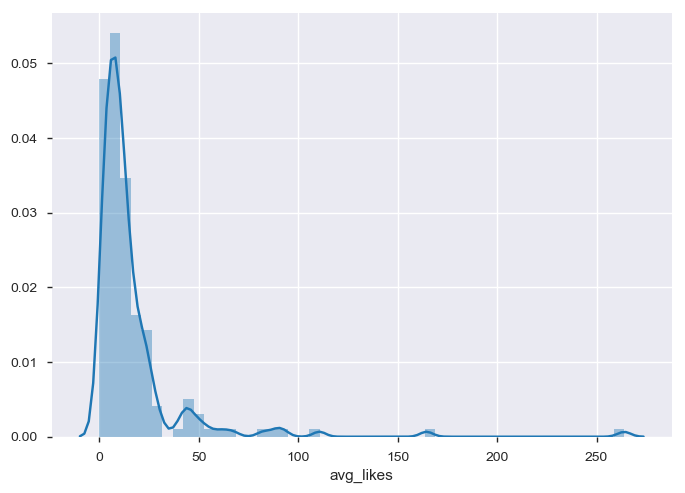

In [55]:
sns.distplot(insta["avg_likes"])
plt.show()

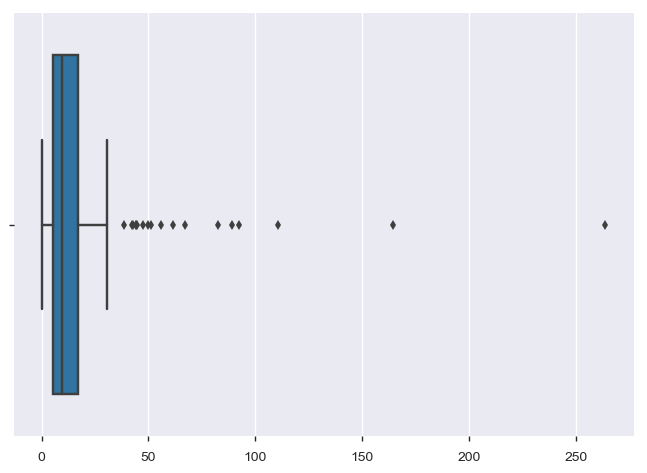

In [56]:
sns.boxplot(data=insta, x=avg_likes)

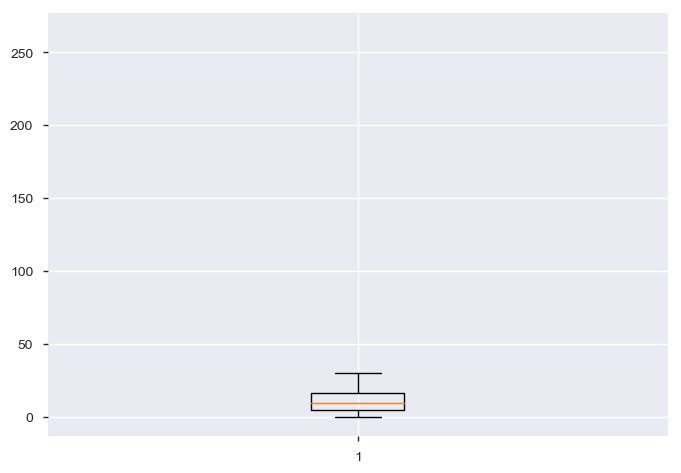

In [57]:
plt.boxplot(data=insta, x=avg_likes)
plt.show()

In [252]:
#converting the clean data to csv
insta.to_csv("./clean_data.csv")

In [253]:
follow_data = pd.read_csv("clean_data.csv")
follow_data["follow_back"] = ""

In [254]:
del follow_data["Unnamed: 0"]

In [255]:
follow_data

,username,name,mutual_connecting,total_following,total_followers,private_account,business_account,recently_joined,avg_likes,avg_comments,total_posts,follow_back
0,7olga7777777,Ольга Петришина,0,107,69,0,0,0,30.500000,3.500000,2,
1,aadamkathst,aadam kathst,2,212,40,0,0,0,3.583333,0.000000,12,
2,aadish___khan,aadish___khan,2,116,65,0,0,0,10.222222,0.333333,18,
3,aarzoo6466,Aarzoo Khan,2,222,40,0,1,1,3.000000,0.000000,1,
4,abbasyadavad,Abbas Yadavad,0,25,17,0,0,0,1.500000,0.000000,2,
5,abhay_raj001,Abhay raj singh,0,30,72,1,0,0,16.250000,2.250000,4,
6,abhijit842073,Abhijit Das,1,171,28,0,0,0,1.000000,0.000000,1,
7,abhishekmishra2764,abhishek mishra,1,84,46,0,0,0,14.454545,0.454545,11,
8,abhishek_choudhary97,abhishek choudhary,1,110,76,0,0,0,21.000000,3.000000,1,
9,adityababu2001,Aditya bhat,0,115,79,0,0,0,18.285714,5.142857,7,


In [258]:
follow_data = pd.read_csv("C:/Users/JANAKINATH/Analyticscosm/purna/follow.csv")
follower_data = pd.read_csv("C:/Users/JANAKINATH/Analyticscosm/purna/followers.csv")

follow = list(follow_data.username)
follower = list(follower_data.username)

follow_back = [1 if user in follower else 0 for user in follow]

follow_data.follow_back = follow_back

follow_data.to_csv('./final.csv', index=False) 

C:\Users\JANAKINATH\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
